In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

In [2]:
df = pd.read_csv('C:/Users/LENOVO/Desktop/Python Work/zomato_bangalore_resturants.csv')

In [3]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
df.shape

(51717, 17)

In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
#Dropping columns that I won't be using and also dropping 'listed_in' as it is same as 'location'
df = df.drop(['url','address','phone','menu_item','dish_liked','reviews_list','listed_in(city)'],axis = 'columns')

df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [8]:
#Checking for duplicates
df.duplicated().any()

True

In [9]:
#dropping the duplicates
df.drop_duplicates(inplace = True)

In [10]:
#Checking the shape, again
df.shape

(35011, 10)

## Data Cleaning

**Cleaning Rate Column**


In [11]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
#Creating a funtion to clean the column by replacing any string with NaN and taking only the rating and converting it into float
def rate_clean(value):
    if value == 'NEW' or value == '-':
        return np.nan
    else:
        value = str(value).split('/')[0]
        return float(value)

In [13]:
#applying the function rate_clean on 'rate' Column
df['rate']= df['rate'].apply(rate_clean)

In [14]:
#Let us check the values
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [15]:
#Checking for null values
df['rate'].isnull().sum()

5097

In [16]:
#replacing null values with the mean of the column
df['rate'].fillna(df['rate'].mean(),inplace = True)

#checking the null values, agin
df['rate'].isnull().sum()

0

In [17]:
df

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet
...,...,...,...,...,...,...,...,...,...,...
51712,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.600000,27,Whitefield,Bar,Continental,"1,500",Pubs and bars
51713,Vinod Bar And Restaurant,No,No,3.730491,0,Whitefield,Bar,Finger Food,600,Pubs and bars
51714,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,3.730491,0,Whitefield,Bar,Finger Food,"2,000",Pubs and bars
51715,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.300000,236,"ITPL Main Road, Whitefield",Bar,Finger Food,"2,500",Pubs and bars


**Renaming the 'approx_cost(for two people)' and 'listed_in(type)' Columns**

In [18]:
# rename columns
df.rename(columns = {'approx_cost(for two people)':'Cost for two','listed_in(type)':'Type'}, inplace = True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost for two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


**Cleaning Cost for two Column** 

In [19]:
df['Cost for two'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [20]:
#Let us remove the ',' from the column by creating a function
def cost_for_2_clean(value):
    value = str(value)
    if ',' in value:
        value = value.replace(',','')
        return float(value)
    else:
        return float(value)

In [21]:
#applying the function to the column
df['Cost for two'] = df['Cost for two'].apply(cost_for_2_clean)

#checking the unique values again.
df['Cost for two'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700.,   nan, 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800.,
       3400.,   40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [22]:
#Looking at the null values in Cost for two

df['Cost for two'].isnull().sum()

221

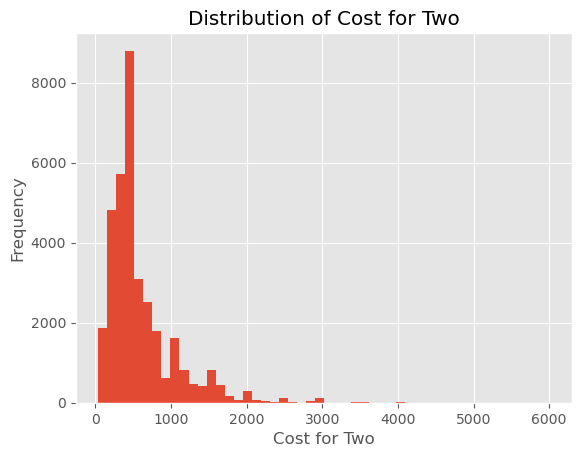

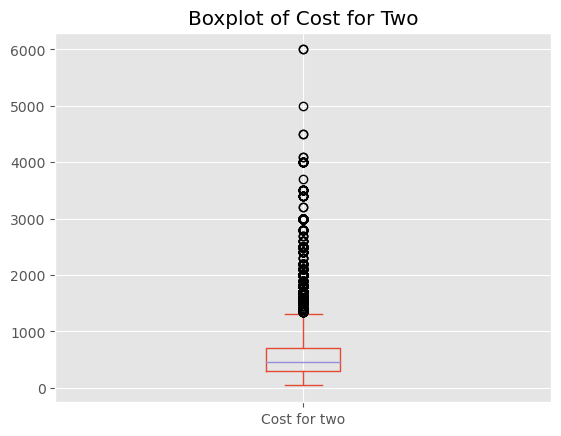

In [23]:
#Let us check the distribution to choose mean or median to fill the nan values
# Plot distribution to check for skewness and outliers
df['Cost for two'].plot(kind='hist', bins=50)
plt.title('Distribution of Cost for Two')
plt.xlabel('Cost for Two')
plt.show()

# Check for outliers using a boxplot
df['Cost for two'].plot(kind='box')
plt.title('Boxplot of Cost for Two')
plt.show()


In [24]:
#Given that your histogram is right-skewed and the boxplot shows many outliers
#using the median for imputing missing values is generally the better choice.

median_cost = df['Cost for two'].median()

# Impute missing values with the median
df['Cost for two'].fillna(median_cost, inplace=True)

# Verify missing values have been handled
print(df['Cost for two'].isnull().sum())

0


In [25]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost for two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


**Cleaning 'rest type' column**

In [26]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [27]:
rest_type_df= df['rest_type'].value_counts(ascending =  False)

In [28]:
#Keep the top N most frequent categories and group all others into "others."
top_n = 10
top_n_rest_types = rest_type_df[:top_n].index

def clean_rest_types(value):
    if value in top_n_rest_types:
        return value
    else:
        return 'Others'
    
df['rest_type']= df['rest_type'].apply(clean_rest_types)

In [29]:
df['rest_type'].value_counts()

Quick Bites           12179
Casual Dining          7573
Others                 5736
Cafe                   2606
Delivery               1520
Dessert Parlor         1504
Takeaway, Delivery     1227
Casual Dining, Bar      961
Bakery                  736
Beverage Shop           488
Bar                     481
Name: rest_type, dtype: int64

In [30]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost for two,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


**Cleaning the location column**

In [31]:
#Checking null values
df['location'].isnull().sum()

14

In [32]:
#Let us replace the nan values with 'Unknown'
df['location'].fillna('Unknown', inplace=True)

In [33]:
location = df['location'].value_counts()
location

BTM                     2514
Whitefield              1972
Indiranagar             1789
HSR                     1769
Marathahalli            1683
                        ... 
Central Bangalore          5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 94, dtype: int64

In [34]:
location = df['location'].value_counts(ascending  = False)

#grouping restaurants in location less than 200
location_lessthan200 = location[location<200]


#Creating a function to categorize them into 'Others'
def handle_location(value):
    if(value in location_lessthan200):
        return 'Others'
    else:
        return value


df['location'] = df['location'].apply(handle_location)

#checking the value_counts
df['location'].value_counts()

Others                   3848
BTM                      2514
Whitefield               1972
Indiranagar              1789
HSR                      1769
Marathahalli             1683
Koramangala 5th Block    1615
JP Nagar                 1411
Jayanagar                1248
Electronic City          1222
Bellandur                1134
Bannerghatta Road        1060
Sarjapur Road             947
Brigade Road              687
Koramangala 7th Block     626
Brookefield               600
Koramangala 6th Block     599
Kalyan Nagar              594
Koramangala 4th Block     587
New BEL Road              586
Banashankari              573
MG Road                   566
Malleshwaram              557
Ulsoor                    547
Koramangala 1st Block     540
Frazer Town               475
Basavanagudi              463
Rajajinagar               462
Church Street             446
Banaswadi                 442
Residency Road            424
Kammanahalli              423
Old Airport Road          407
Lavelle Ro

**Cleaning Cuisines**

In [35]:
#checking null values with respect to cuisines column
df['cuisines'].isnull().sum()

33

In [36]:
#replacing the null values with Unknown
df['cuisines'].fillna('Unknown', inplace=True)

In [37]:
df.isnull().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
Cost for two    0
Type            0
dtype: int64

### Data Visualization

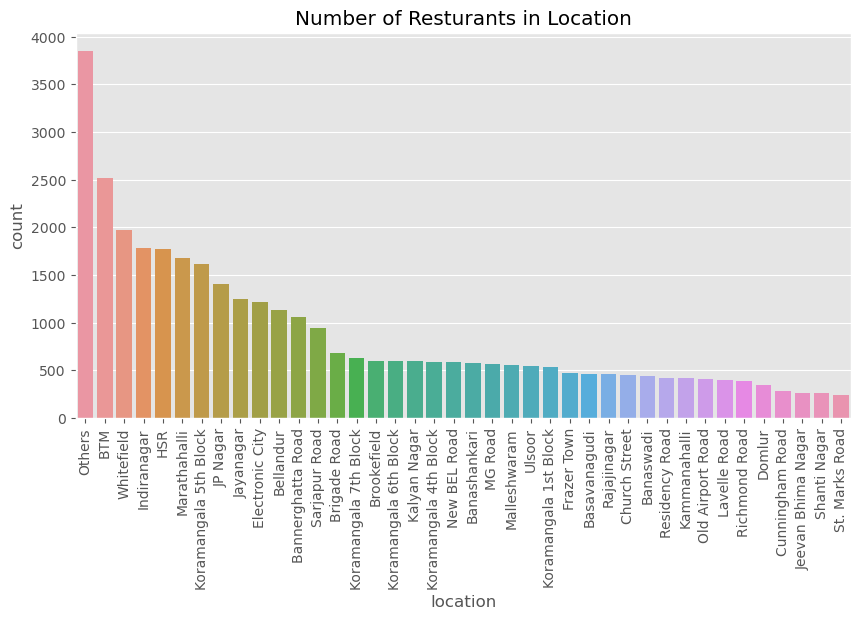

In [38]:
#Count plot for various locations

plt.figure(figsize = (10,5))
sns.countplot(x='location',data = df,order = df['location'].value_counts().index)
plt.xticks(rotation = 90)
plt.title ('Number of Resturants in Location')
plt.show()

**Insights from the Graph**

**Dominance of "Others":**

The category labeled "others" has the highest count of restaurants, significantly more than any specific location. This suggests that there are many small or less popular locations with fewer restaurants each, which collectively form the largest group.

**Top Locations for Restaurants:**

The top locations with the most restaurants, after "others", are BTM, Whitefield, Indiranagar, HSR, and Marathahalli.
These areas are known for their commercial activity and vibrant dining scenes, making them popular spots for restaurant businesses. Lcations towards the right of the graph (e.g., Frazer Town, Richmond Road, Shanti Nagar) have fewer restaurants. This might indicate less commercial activity or residential population in these areas compared to the more popular ones.



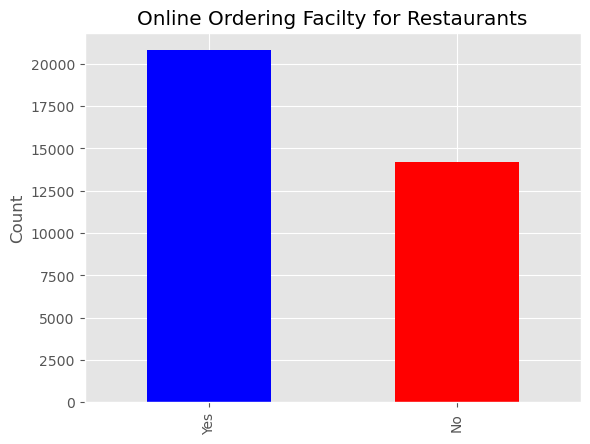

In [39]:
#Looking at online orders facilities
df['online_order'].value_counts().plot(kind = 'bar',color = ['b','r'])
plt.title('Online Ordering Facilty for Restaurants')
plt.ylabel('Count')
plt.show()

In [40]:
#Let us look the percentages
df['online_order'].value_counts(normalize= True)

Yes    0.59447
No     0.40553
Name: online_order, dtype: float64

**Insights from the Graph**

Looks like 60% percent of the restaurants have online ordering facility and the remaining 40% don't. Let's dig more into this

In [41]:
#Looking at the bifurcation, let us check for each location
online_facility = df.groupby(['location','online_order']).size().unstack(level=1)
online_facility

online_order,No,Yes
location,,
BTM,815,1699
Banashankari,260,313
Banaswadi,223,219
Bannerghatta Road,407,653
Basavanagudi,182,281
Bellandur,443,691
Brigade Road,293,394
Brookefield,208,392
Church Street,182,264


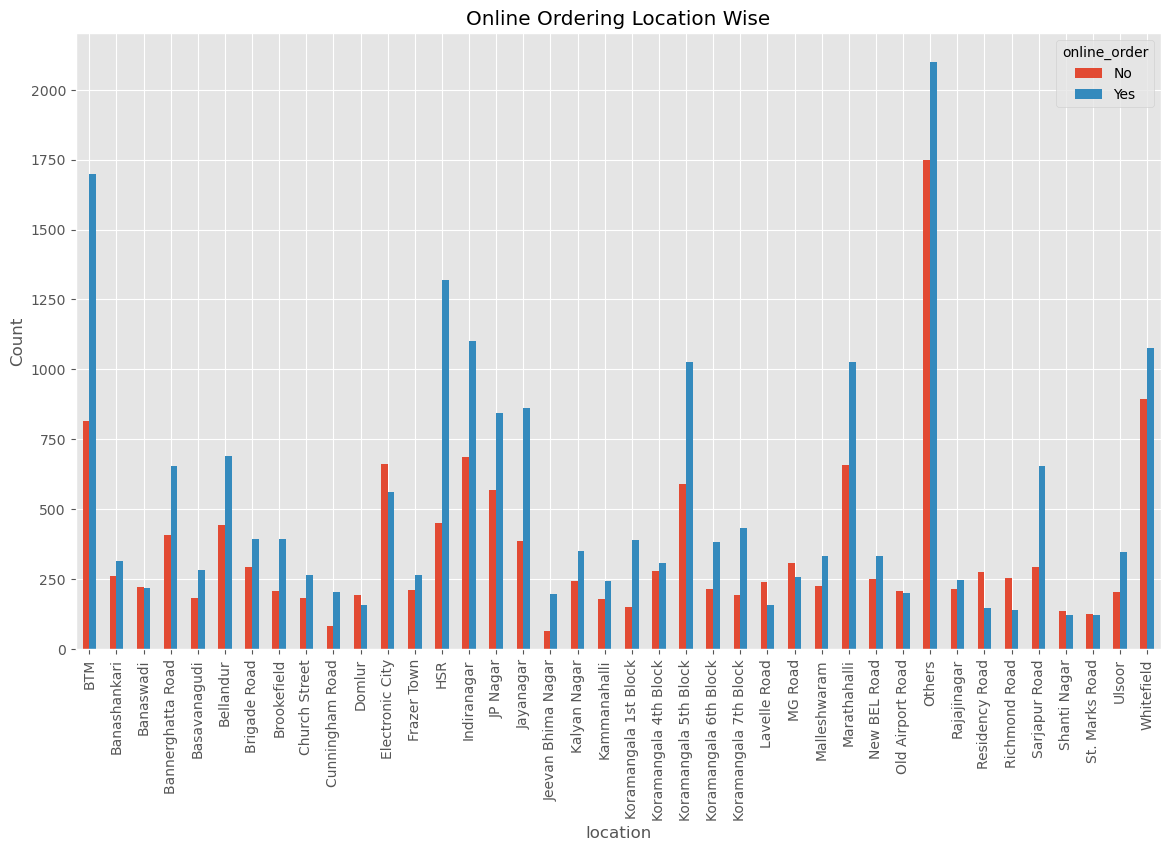

In [42]:
#lets plot it

online_facility.plot(kind = 'bar',figsize = (14,8))
plt.title('Online Ordering Location Wise')
plt.ylabel('Count')
plt.show()

**Insights from the Graph**

**High Online Order Availability:**
Whitefield, BTM, Indiranagar, HSR, Marathahalli have the highest number of restaurants offering online orders, indicating high demand in these areas.

**Balanced Distribution:**
Banashankari, Jayanagar, Koramangala 5th Block, Frazer Town show a more balanced mix of restaurants with and without online orders.

**Low Online Order Availability:**
Kalyan Nagar, JP Nagar, Rajajinagar, Shanti Nagar have fewer restaurants offering online orders, suggesting potential areas for growth.

**BTM Area:**
Although BTM has many restaurants offering online orders, it also has a significant number without this service, indicating diverse customer preferences.

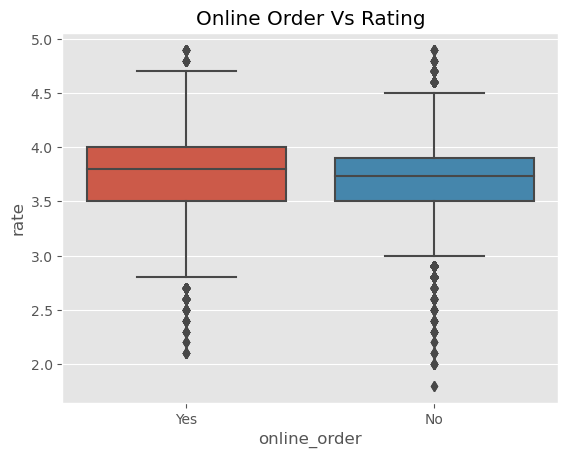

In [43]:
#Vizualizing online order vs rate
sns.boxplot(x = 'online_order',y = 'rate',data = df)
plt.title('Online Order Vs Rating')
plt.show()

**Insights form this graph:**

Restaurants that offer online orders tend to have slightly higher ratings, indicating better customer satisfaction. This might be due to the convenience and added value of offering online orders. However, both groups share similar overall rating distributions, suggesting that other factors also significantly influence restaurant ratings.

No     0.845706
Yes    0.154294
Name: book_table, dtype: float64


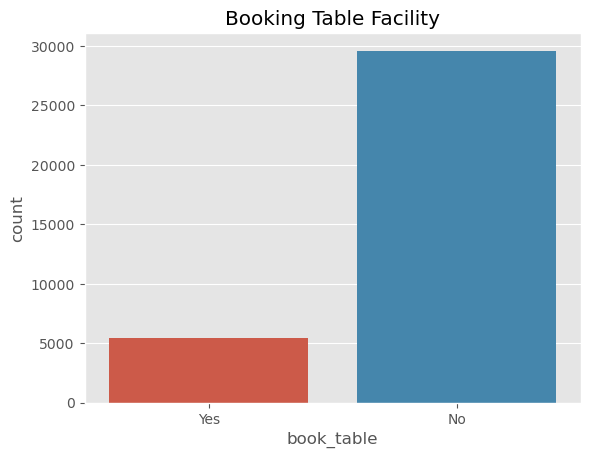

In [44]:
#Visualizing book table facility
print(df['book_table'].value_counts(normalize = True))
sns.countplot(x = 'book_table',data = df)
plt.title('Booking Table Facility')
plt.show()

**insights from this graph:**
    
Looks like alot of restuarants(85%) do no have booking facility. Let's dig into it.

In [45]:
book_facility = df.groupby(['location','book_table']).size().unstack(level =1)
book_facility

book_table,No,Yes
location,,
BTM,2388,126
Banashankari,530,43
Banaswadi,436,6
Bannerghatta Road,981,79
Basavanagudi,451,12
Bellandur,1038,96
Brigade Road,541,146
Brookefield,527,73
Church Street,279,167


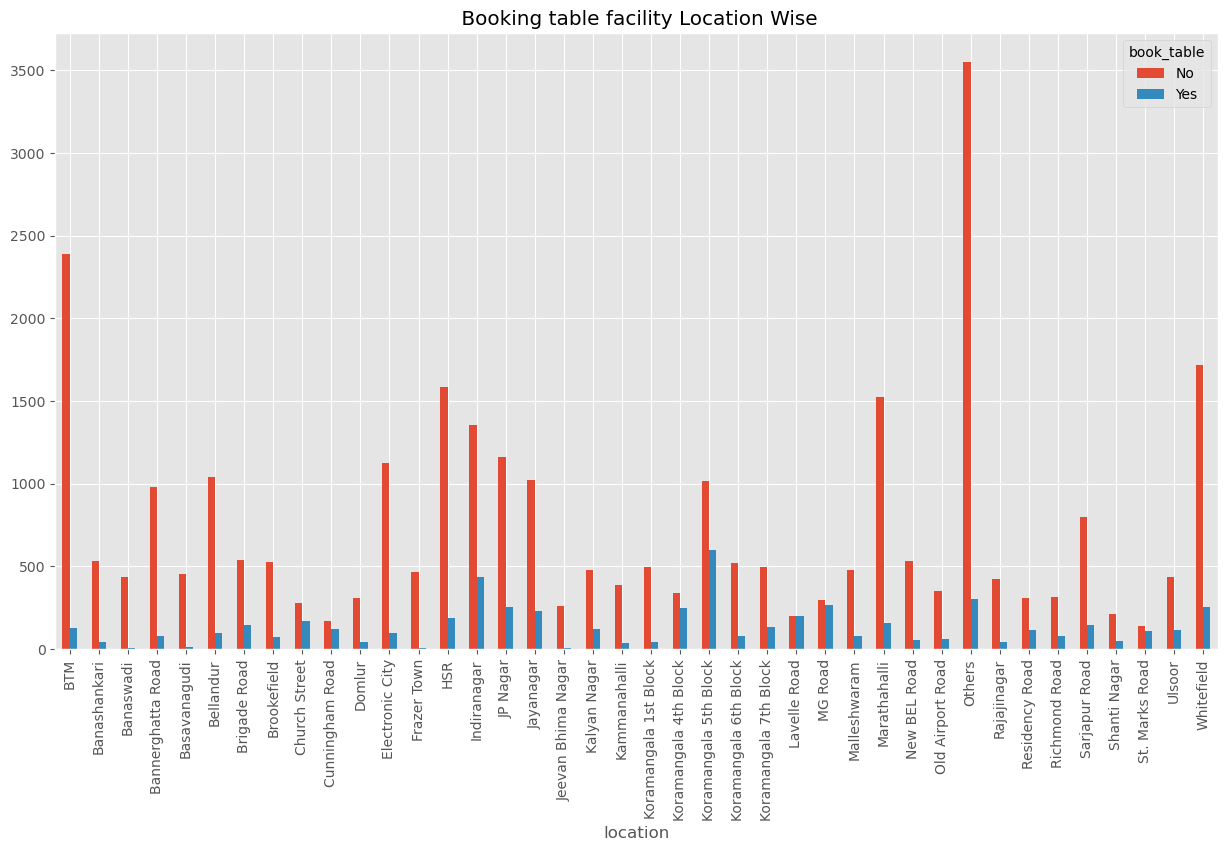

In [46]:
book_facility.plot(kind = 'bar',figsize = (15,8))
plt.title(' Booking table facility Location Wise')
plt.show()

**Insights from this graph:**

**High Non-Availability:** Most locations, especially BTM, HSR, Indiranagar, Koramangala 5th Block, Marathahalli, and Whitefield, lack table booking facilities.

**Areas with High Demand:** Indiranagar, Koramangala 5th Block, and Whitefield are popular, yet most venues don't offer table booking.

**Minimal Booking Facilities:** Bellandur, Church Street, Cunningham Road, Domlur, Electronic City, and Frazer Town have few or no venues with booking facilities.

**Significant Booking Availability:** Indiranagar, Koramangala 5th Block, and Whitefield have relatively more booking facilities compared to other areas.

**Other Locations:** Many smaller or less popular locations collectively contribute to a high number of venues without booking facilities.

**Potential Market for Booking Facilities:** Popular areas with many non-booking venues suggest a market opportunity for increasing table booking services.

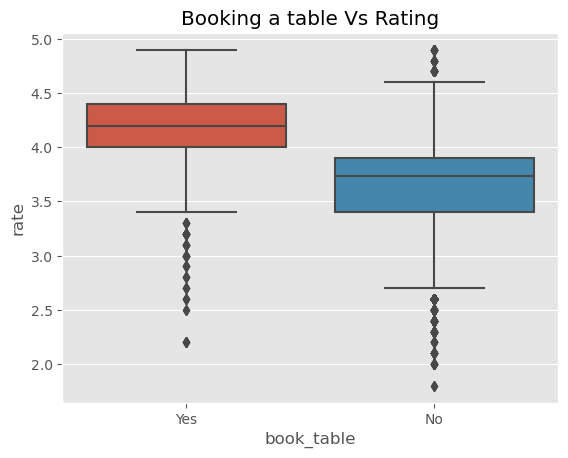

In [47]:
#book_table vs rate
sns.boxplot(x = 'book_table', y = 'rate', data = df)
plt.title('Booking a table Vs Rating')
plt.show()

**Insights from this graph**

Looks like the rating of the retaurant that has a booking table option has a higher avg rating when compared to a restaurant with no booking table option. Venues with table booking facilities tend to have higher and more consistent ratings, suggesting a better overall customer experience. Non-booking venues show more variability in ratings, with both higher instances of low ratings and a broader range of customer satisfaction.

Both categories have outliers, but non-booking venues show more significant negative outliers, with ratings dropping as low as 2.0. This could indicate occasional poor experiences at non-booking venues.

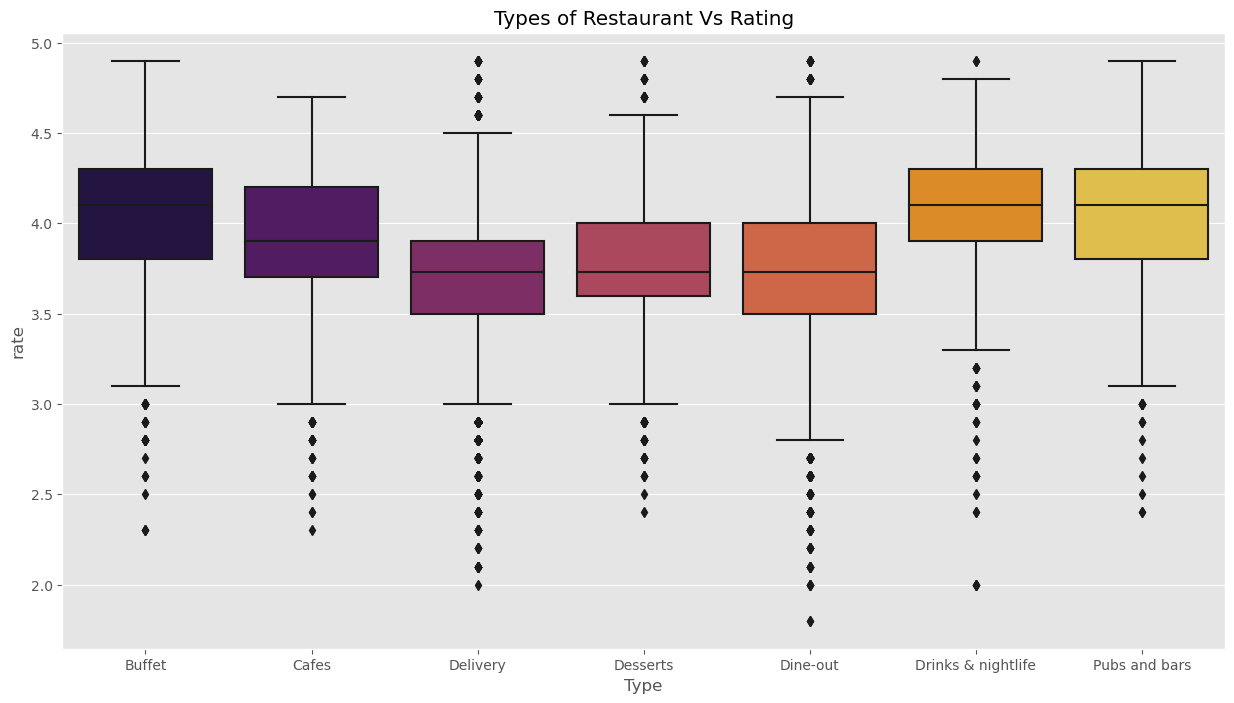

In [48]:
#Visualizing Types of Restaurents vs Rate
plt.figure(figsize = (15,8))
sns.boxplot(x = 'Type', y = 'rate', data = df, palette = 'inferno')
plt.title("Types of Restaurant Vs Rating")
plt.show()

**Insights from this graph**

pubs and bars, along with drinks & nightlife venues, tend to have the highest and most consistent ratings, indicating strong customer satisfaction. Delivery services have the lowest median rating and the widest variability, suggesting more inconsistent customer experiences. Cafes and buffets tend to have more consistent ratings, while dine-out and dessert venues show a broader range of customer satisfaction.

In [49]:
#Grouping Types of Restaurents location wise
rest_loc = df.groupby(['location','Type'])['name'].count().unstack(level = 1).fillna(0)
rest_loc

Type,Buffet,Cafes,Delivery,Desserts,Dine-out,Drinks & nightlife,Pubs and bars
location,,,,,,,
BTM,17.0,46.0,1434.0,112.0,876.0,15.0,14.0
Banashankari,5.0,24.0,244.0,46.0,247.0,7.0,0.0
Banaswadi,0.0,13.0,164.0,19.0,241.0,4.0,1.0
Bannerghatta Road,8.0,27.0,515.0,92.0,407.0,9.0,2.0
Basavanagudi,4.0,8.0,195.0,45.0,208.0,3.0,0.0
Bellandur,28.0,34.0,519.0,72.0,448.0,17.0,16.0
Brigade Road,13.0,24.0,249.0,55.0,273.0,51.0,22.0
Brookefield,6.0,17.0,300.0,42.0,231.0,4.0,0.0
Church Street,19.0,44.0,138.0,21.0,172.0,31.0,21.0


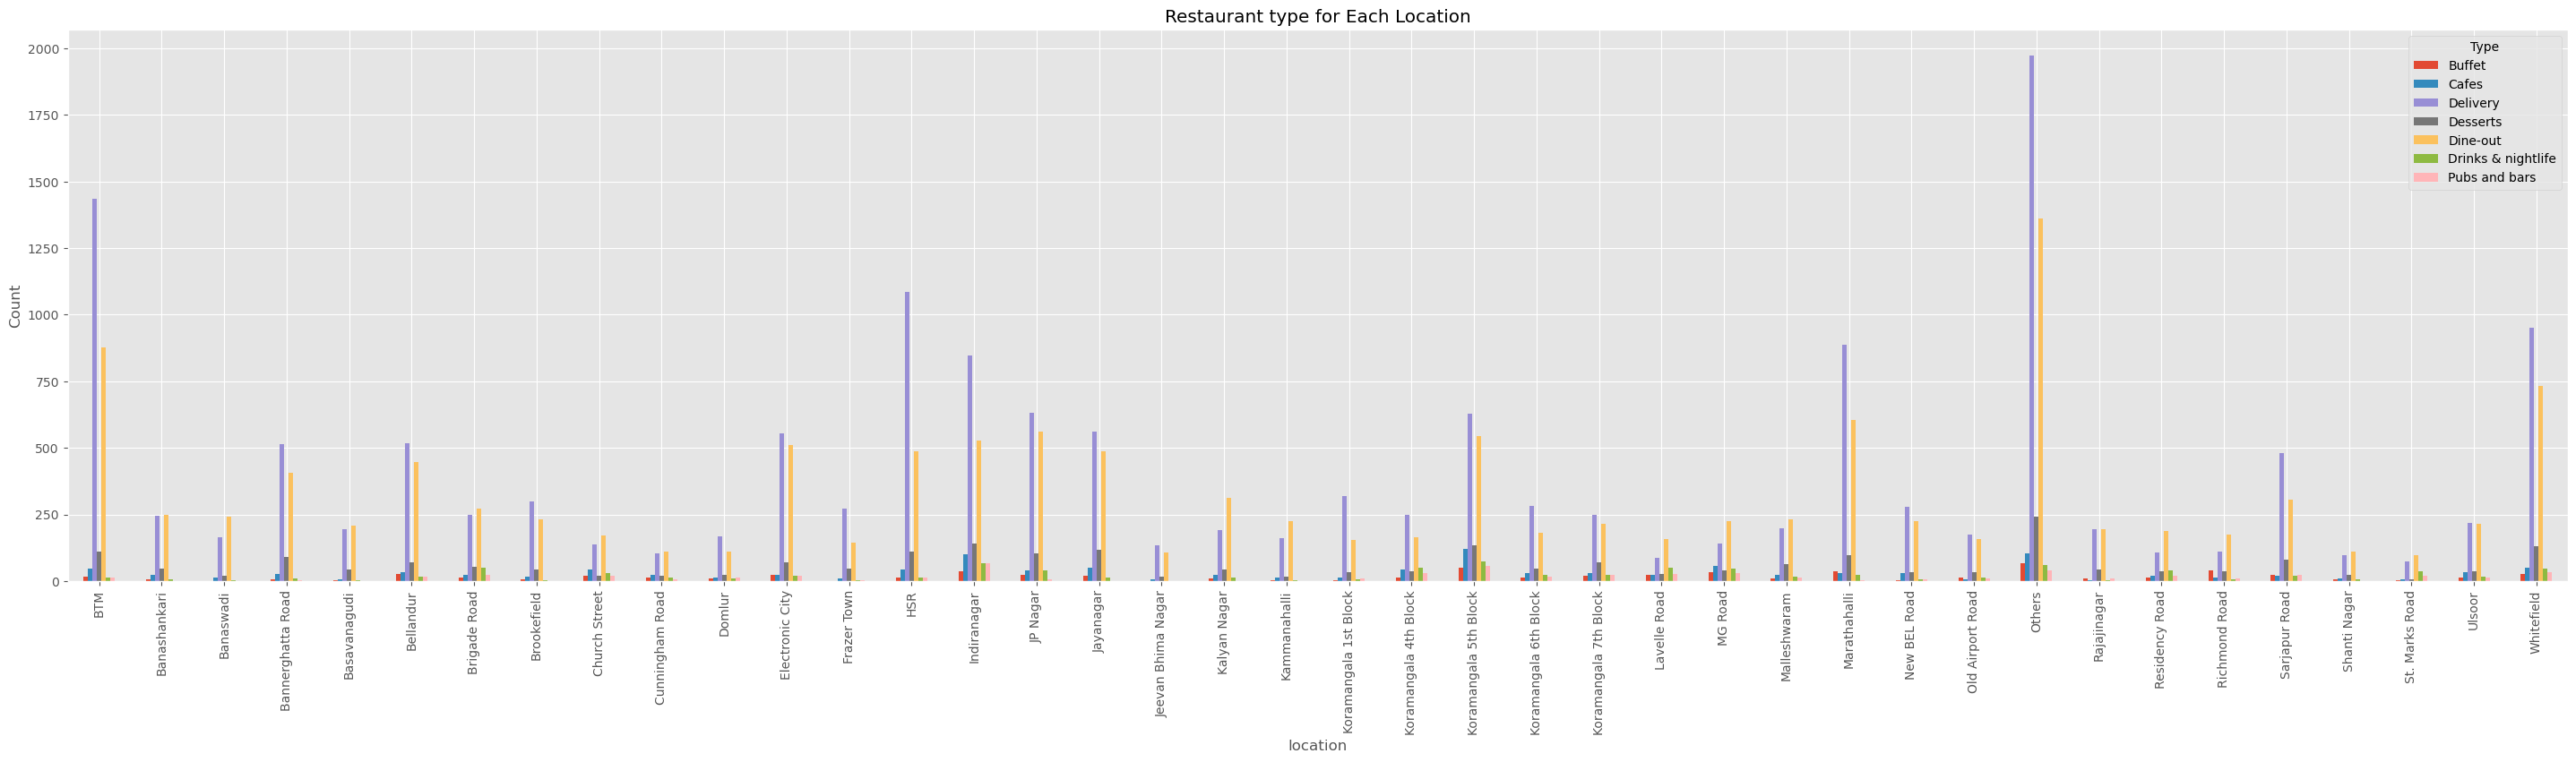

In [50]:
rest_loc.plot(kind = 'bar', figsize = (36,8))
plt.title('Restaurant type for Each Location')
plt.ylabel('Count')
plt.show()

**Insights from this graph**

Bars and Pubs: Locations like "MG Road" and "Koramangala 4th Block" have a high number of bars and pubs.

Cafes: Locations such as "Whitefield" and "HSR Layout" have a notable presence of cafes.

Casual Dining: This type of restaurant seems to be prevalent across many locations, but especially in "Indiranagar" and "Koramangala 5th Block".

Also, Locations like "Church Street" and "Jayanagar" have a balanced distribution of different types of restaurants.
"Brigade Road" shows a high concentration of bars and pubs, but fewer cafes and dessert places..

In [51]:
#Voting location wise

vote_loc = df[['location', 'votes']].drop_duplicates()
vote_loc_df = vote_loc.groupby('location')['votes'].sum()
vote_loc_df.sort_values(ascending =  False)

location
Koramangala 5th Block    1063081
Indiranagar               653073
Church Street             291543
Koramangala 4th Block     282003
JP Nagar                  277901
Jayanagar                 265183
Whitefield                237148
HSR                       236859
Marathahalli              226475
Koramangala 7th Block     224738
Lavelle Road              218929
Brigade Road              213283
BTM                       206401
MG Road                   187373
Others                    179141
Koramangala 6th Block     158019
Sarjapur Road             139703
Residency Road            137966
St. Marks Road            135944
Malleshwaram              133692
Bannerghatta Road         101299
Koramangala 1st Block      93914
New BEL Road               90517
Cunningham Road            83288
Bellandur                  78265
Kalyan Nagar               74744
Old Airport Road           73200
Brookefield                59197
Banashankari               58709
Electronic City            55750
U

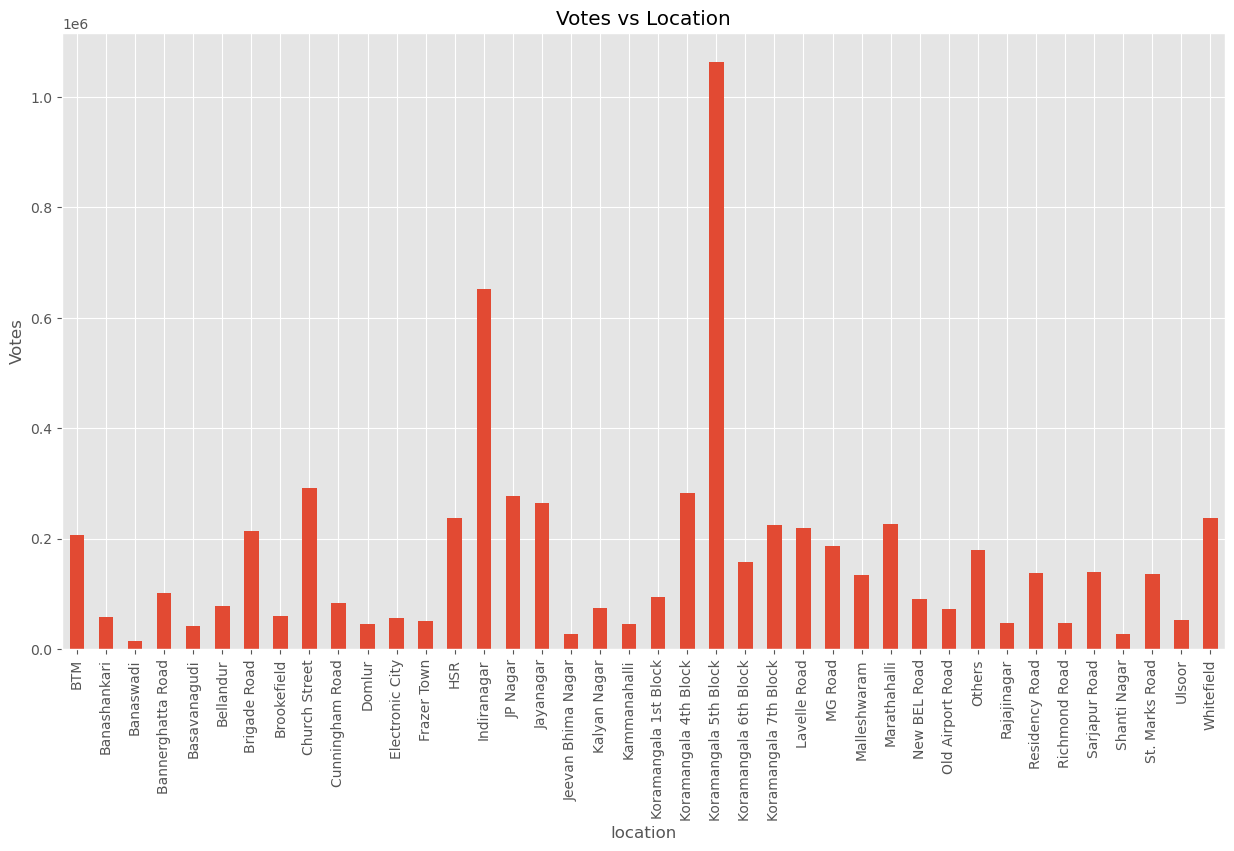

In [52]:
vote_loc_df.plot(kind = 'bar', figsize = (15,8))
plt.ylabel('Votes')
plt.title('Votes vs Location')
plt.show()

**Insights from this graph**

The graph shows a clear concentration of dining activity and popularity in specific locations such as Koramangala 5th Block, Whitefield, Indiranagar, Koramangala 7th Block, and HSR Layout. These areas are evidently popular dining destinations with a high number of reviews. Other locations show moderate to low review activity, indicating varying levels of dining popularity and potential for growth. And if we look back we also see that these locations have the highest number of restuarants as well.


**Cuisines**

In [53]:
from itertools import combinations
from collections import Counter

In [54]:
# Building a counter for the best 1 cuisines 
count = Counter()

for row in df['cuisines']:
    if pd.notna(row):  # Check if the row is not NaN
        row_list = str(row).split(', ')
        count.update(Counter(combinations(row_list, 1)))

In [55]:
count.most_common(10)

[(('North Indian',), 14604),
 (('Chinese',), 10590),
 (('South Indian',), 5646),
 (('Fast Food',), 5246),
 (('Biryani',), 4505),
 (('Continental',), 4387),
 (('Desserts',), 3827),
 (('Cafe',), 3811),
 (('Beverages',), 3176),
 (('Italian',), 2538)]

**Top Cuisines:** North Indian and Chinese cuisines are the most popular, with North Indian leading significantly. Fast food and South Indian also show strong presence.

**Other Popular Choices:** Biryani, Continental, Desserts, Cafe, Beverages, and Italian cuisines are well-represented, indicating diverse consumer preferences.

In [56]:
# Building a counter for the best 2 cuisines 
count = Counter()

for row in df['cuisines']:
    if pd.notna(row):  # Check if the row is not NaN
        row_list = str(row).split(', ')
        count.update(Counter(combinations(row_list, 2)))

#getting the top 10 pairs
count.most_common(10)

[(('North Indian', 'Chinese'), 6332),
 (('South Indian', 'Chinese'), 1930),
 (('South Indian', 'North Indian'), 1588),
 (('North Indian', 'South Indian'), 1557),
 (('Chinese', 'North Indian'), 1522),
 (('North Indian', 'Biryani'), 1439),
 (('Biryani', 'North Indian'), 1121),
 (('Continental', 'North Indian'), 1088),
 (('Cafe', 'Continental'), 1038),
 (('Cafe', 'Italian'), 942)]

North Indian and Chinese cuisines are the most frequently paired, with 6,332 occurrences.

Overall, North Indian cuisine frequently appears in popular combinations, suggesting it is a central component in many dining preferences.

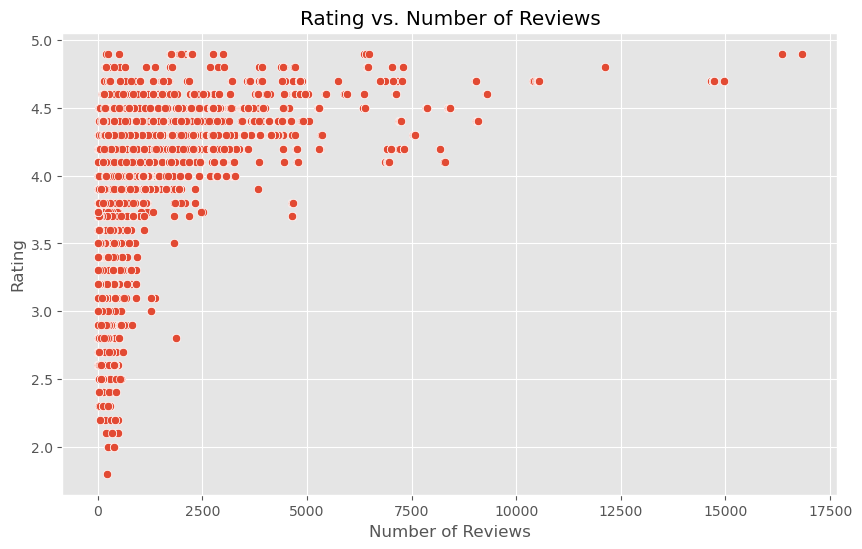

In [57]:
#Rating vs. Number of Reviews
# Scatter plot to see the relationship between ratings and number of reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rate', data=df)
plt.title('Rating vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.show()

**Insights from the graph**

The scatter plot indicates that while many restaurants maintain high ratings, the number of reviews varies significantly. High ratings do not necessarily correlate with a high volume of reviews, suggesting that both lesser-known and highly popular establishments can achieve high quality. Conversely, restaurants with lower ratings tend to have fewer reviews, which might reflect limited exposure or less favorable experiences.

                  rate  Cost for two
rate          1.000000      0.395223
Cost for two  0.395223      1.000000


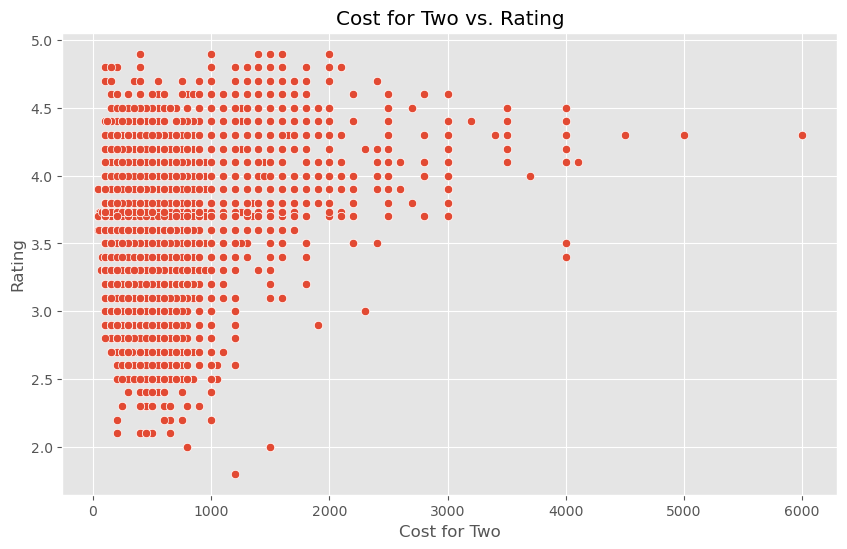

In [58]:
#Cost and Rating Analysis
# Scatter plot to analyze the relationship between cost for two and rating
print(df[['rate','Cost for two']].corr())
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost for two', y='rate', data=df)
plt.title('Cost for Two vs. Rating')
plt.xlabel('Cost for Two')
plt.ylabel('Rating')
plt.show()

**Insights from this graph**

These observations suggest that while there are many affordable restaurants with good ratings, higher-priced restaurants also tend to maintain decent ratings, though they are fewer in number.

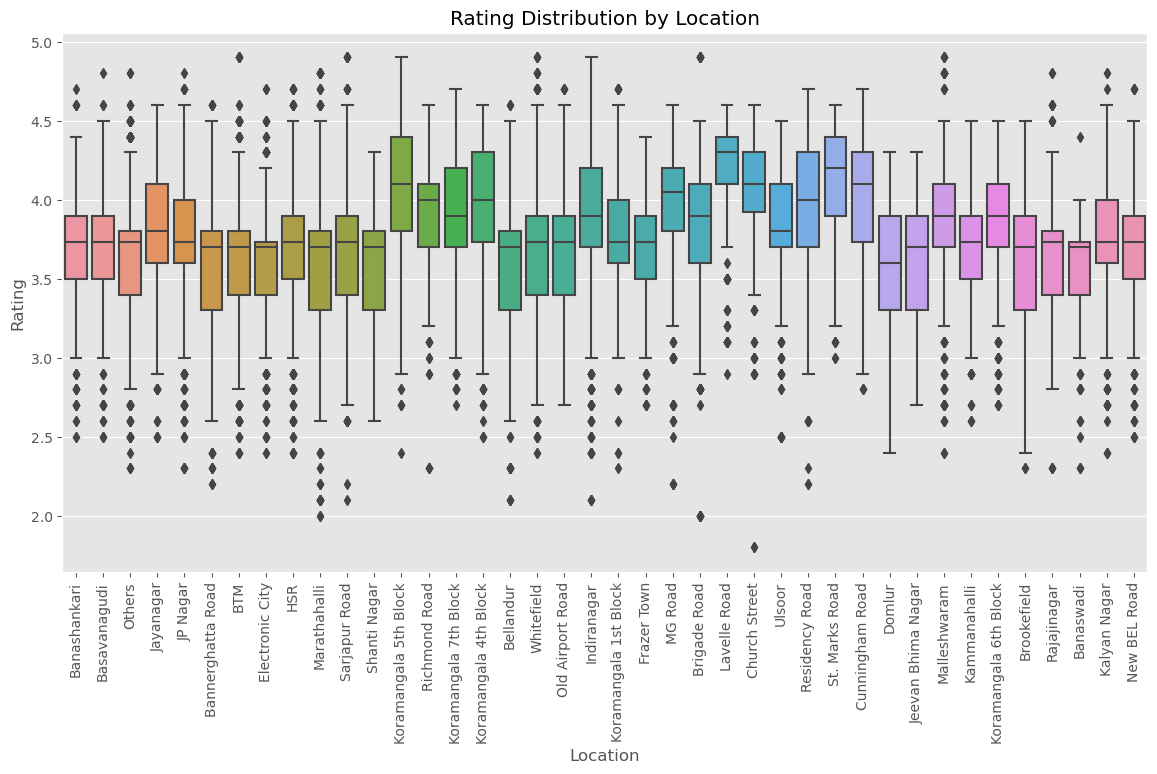

In [59]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='location', y='rate', data=df)
plt.xticks(rotation=90)
plt.title('Rating Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Rating')
plt.show()

**Insights from graph**

Overall, while there are high-rated restaurants across various locations, some areas exhibit more consistent quality, and others show greater variability in customer satisfaction. This can help diners choose areas based on their preference for either consistent quality or a wider range of dining experiences.

## Recommendations

### Based on the insights from the data:

### Recommended Areas to Establish a Restaurant

1. **High-Demand Areas:**
   - **Koramangala 5th Block:** High number of votes and reviews, indicating a vibrant dining scene with substantial customer engagement.
   - **Whitefield:** Another popular location with significant review activity, suggesting strong market potential.
   - **Indiranagar:** Known for high activity and positive reviews, making it a prime location for attracting a diverse customer base.

2. **Under-Served Markets:**
   - **Kalyan Nagar:** Lower review counts and median ratings suggest a potential market with opportunities for improvement and growth.
   - **JP Nagar:** Another area with potential for new restaurant ventures due to lower restaurant density.
   - **Shanti Nagar:** Limited restaurant presence could be a chance to introduce new dining options.

3. **Competitive Edge:**
   - **Banashankari** and **Lavelle Road:** Locations with consistent high ratings and customer satisfaction. Establishing a restaurant here could benefit from existing positive sentiment and stable quality expectations.
   - **In Popular Areas:** Differentiating through unique cuisine offerings, exceptional service, or added features like online ordering and table booking could help in standing out.

4. **Cuisine Trends:**
   - **North Indian and Chinese Cuisines:** These are the most popular and frequently paired, making them strong choices for menu focus to attract a broad customer base.

5. **Incorporate Booking Facilities:**
   - **High-Traffic Areas:** Adding table booking options in locations where they are currently underrepresented could enhance customer satisfaction and meet existing demand.

### Summary
Opening a restaurant in high-activity areas such as Koramangala 5th Block, Whitefield, and Indiranagar would leverage the existing dining popularity. Exploring under-served markets like Kalyan Nagar and JP Nagar could offer growth opportunities. Aligning your restaurant with popular cuisine trends and incorporating booking facilities could further enhance your competitive edge and attract a diverse customer base.
